In [38]:
import pandas as pd
import numpy as np
from os import path
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [39]:
data_path = path.abspath("../data/processed_data/US_Superstore_data.xls")
data = pd.read_csv(data_path)
data

,Segment_Consumer,Segment_Corporate,Segment_Home Office,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Sales,Quantity,Discount,Profit
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.051508,2,0.00,0.056590
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.805593,3,0.00,0.815013
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.345350,2,0.00,-0.092997
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.167630,5,0.45,-1.757397
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.332919,2,0.20,-0.111587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.328298,3,0.20,-0.104816
9990,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.221258,2,0.00,-0.055595
9991,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.046078,2,0.20,-0.039544
9992,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.321315,4,0.00,-0.065470


In [40]:
#segundo as metricas 10 é melhor
clustering = DBSCAN(eps=10, min_samples=15).fit(data)
labels = clustering.labels_

In [41]:
#entre 1 e -1
score = silhouette_score(data, labels)
print("Silhouette Score:", score)

#abaixo de 1.0 é bom
score = davies_bouldin_score(data, labels)
print("Davies-Bouldin Index:", score)

#quanto maior melhor
score = calinski_harabasz_score(data, labels)
print("Calinski-Harabasz Score:", score)

Silhouette Score: 0.8830448083906777
Davies-Bouldin Index: 1.2485526362406603
Calinski-Harabasz Score: 342.1811562641702


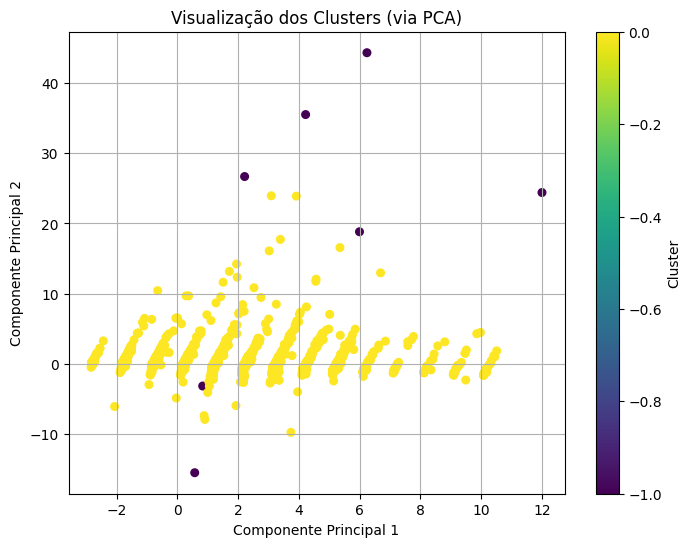

In [42]:
# Reduz os dados para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

# labels pode vir de KMeans, DBSCAN, etc.

# Cria a plotagem
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30)

# Adiciona título e legenda
plt.title('Visualização dos Clusters (via PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()